# Bird Species Prediction

In this project we will create a Convolutional Neural Network which will be able to predict species of the bird. We will use different layers and other hyperparameters for building, training and testing this multiclass classifictaion model. We will be using keras for this project.

In [2]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

We will start by importing some required libraries.

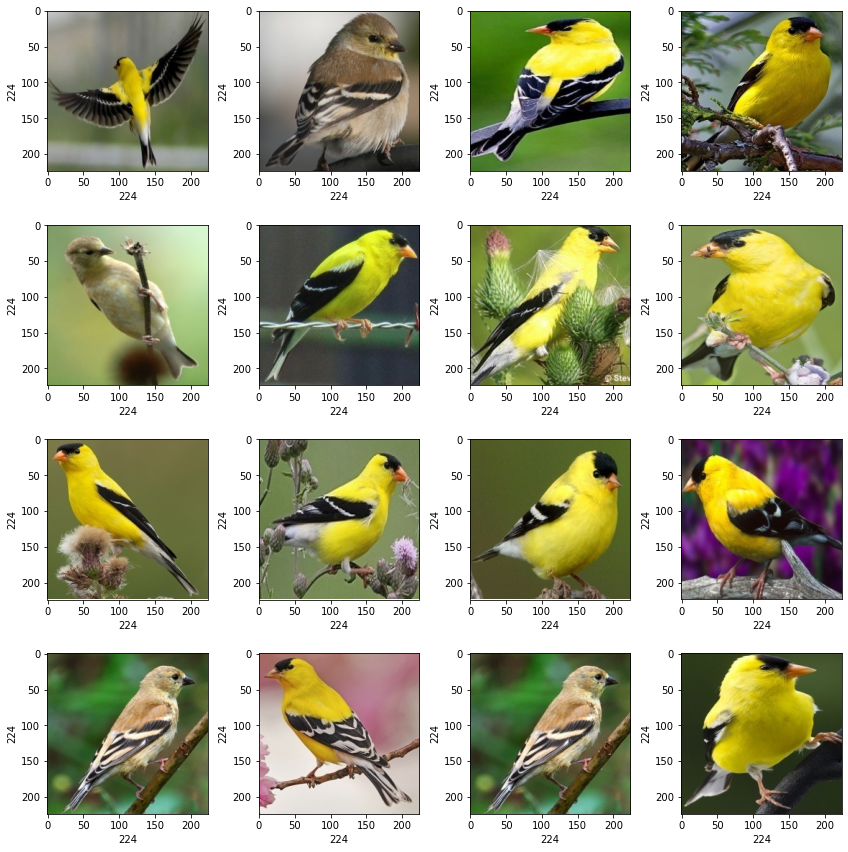

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "./Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

Let's visualize some of the bird images that we will be working on. Also we will observe x and y dimensions of the image.

In [5]:
# Setting path and creating empty list
dir = "./Data/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

Setting the root directory for the dataset and storing all the floders name of the dataset. We will also create 2 empty list for image and lables.

In [6]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

Next we will read all the images and convert it into array and appending the list created above with the image and its label.

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

Check for class imbalance.

In [8]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

Next we will find out the number of classes that we will be working on.

In [9]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

Checking the size of the single image.

In [10]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

Checking the shape of image labels which will be equal to the number of images we are going to work with.

In [11]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now we will split the data into training and testing using train_test_split() of sklearn.

In [12]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

Next we will normalize the images by dividing them with 255. Also, we will reshape x_train and x_test.

In [13]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


Next we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes. 

In [14]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Now we will split the training data to validation and training data.

In [15]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [16]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(0.0005),
              metrics=['accuracy'])

While compiling the model we need to set the type of loss which will be Categorical Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [17]:
# Training the model
epochs = 50
batch_size = 128

history = model.fit(x_train,
                    y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 3s 506ms/step - loss: 1.8255 - accuracy: 0.1737 - val_loss: 1.7816 - val_accuracy: 0.2615
Epoch 2/50
5/5 [==============================] - 2s 427ms/step - loss: 1.7468 - accuracy: 0.2375 - val_loss: 1.7342 - val_accuracy: 0.2154
Epoch 3/50
5/5 [==============================] - 2s 421ms/step - loss: 1.6893 - accuracy: 0.2896 - val_loss: 1.6804 - val_accuracy: 0.4385
Epoch 4/50
5/5 [==============================] - 2s 423ms/step - loss: 1.6157 - accuracy: 0.4517 - val_loss: 1.6190 - val_accuracy: 0.3077
Epoch 5/50
5/5 [==============================] - 2s 420ms/step - loss: 1.5582 - accuracy: 0.3475 - val_loss: 1.5689 - val_accuracy: 0.3846
Epoch 6/50
5/5 [==============================] - 2s 421ms/step - loss: 1.5289 - accuracy: 0.4402 - val_loss: 1.5984 - val_accuracy: 0.4692
Epoch 7/50
5/5 [==============================] - 2s 435ms/step - loss: 1.4157 - accuracy: 0.5560 - val_loss: 1.4518 - val_accuracy: 0.4923
Epoch 8/50
5/5 [====

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 50 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy but here we can see that the model has already reached a very high accuracy so we don't need to run it for more. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [18]:
# Saving model
model.save("bird_species.h5")

Now we will save the model in h5 format to use it later for prediction.

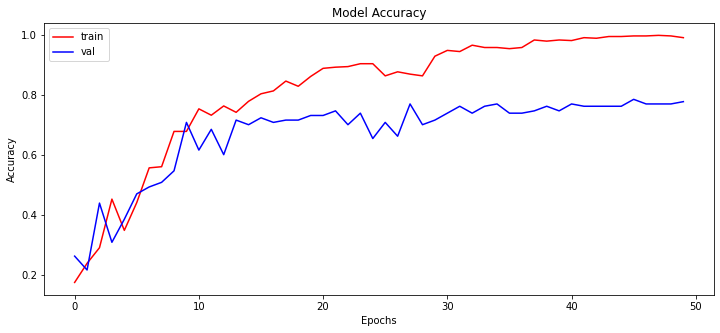

In [19]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Next we will plot the accuracy of the model for the training history.

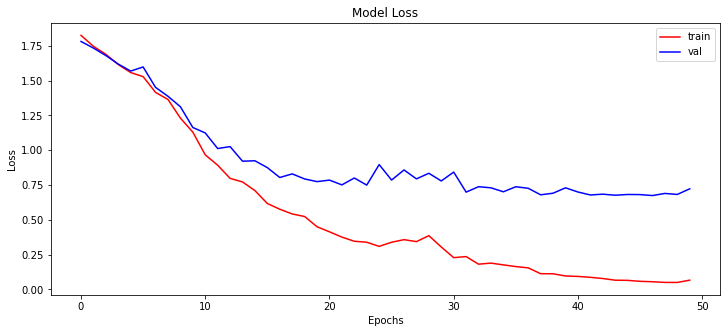

In [20]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Here we will plot the loss of the model for the training history.

In [21]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 0s 34ms/step - loss: 0.4616 - accuracy: 0.8282
Test Accuracy: 82.82208442687988


Evaluating the model to know the accuracy of the model on the test data.

In [22]:
# Storing predictions
y_pred = model.predict(x_test)

Here we are storing prediction on test data.

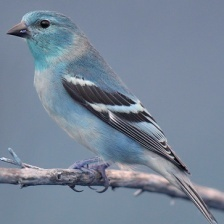

In [23]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

Visualizing one of the image which we will be further used for prediction.

In [24]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH


Now, we will create list of labels using object of label binarizer. We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax(). 

# Conclusion:

We started with loading the dataset into google colab using google drive and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN Model which is further used for predicting the bird species using the image supplied to model. 

# Scope:

This project can be used for educational purposes to get a better understanding of how to create network architecture for a CNN model. You can further hyper parameter tune this model to reach a higher accuracy. It can be used by bird sanctuaries to identify different types of birds. 